In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import lilliefors

sns.set()

df = pd.read_excel('db.xlsx')
df.head()

,Дата для смены,Месяц,Смена,Самосвал,"Avg-Вес по СКЗ, т","Sum-Расстояние, км","Avg-Средняя скорость, км/ч",Avg-Перепад высот,StDev-Перепад высот,"Расход топлива, л"
0,2022-10-01,10,1,1035,228.500000,25.99,17.731667,152.283333,66.851789,575.0
1,2022-10-01,10,1,1037,214.818182,80.42,17.938182,125.609091,48.356601,1795.0
2,2022-10-01,10,1,1039,221.533333,73.36,16.754000,179.664286,70.469738,1688.0
3,2022-10-01,10,1,1040,229.466667,94.95,16.555333,NaN,NaN,1865.0
4,2022-10-01,10,1,1042,NaN,60.46,NaN,77.514286,47.216396,1519.0


In [2]:
df.count()

Дата для смены                19057
Месяц                         19057
Смена                         19057
Самосвал                      19057
Avg-Вес по СКЗ, т             17937
Sum-Расстояние, км            18552
Avg-Средняя скорость, км/ч    18275
Avg-Перепад высот             17242
StDev-Перепад высот           18118
Расход топлива, л             18337
dtype: int64

In [3]:
df.tail()

,Дата для смены,Месяц,Смена,Самосвал,"Avg-Вес по СКЗ, т","Sum-Расстояние, км","Avg-Средняя скорость, км/ч",Avg-Перепад высот,StDev-Перепад высот,"Расход топлива, л"
19052,2022-03-31,3,2,1499,213.125000,95.37,18.866875,130.162500,41.011882,1752.0
19053,2022-03-31,3,2,1502,211.866667,46.54,NaN,217.707692,99.846286,1302.0
19054,2022-03-31,3,2,1503,226.937500,82.54,16.953750,179.475000,70.083774,1775.0
19055,2022-03-31,3,2,1504,219.066667,93.79,20.134000,139.846667,18.230816,1636.0
19056,2022-03-31,3,2,1505,221.176471,53.45,NaN,229.346667,99.174693,1687.0


In [4]:
df.describe()

,Дата для смены,Месяц,Смена,Самосвал,"Avg-Вес по СКЗ, т","Sum-Расстояние, км","Avg-Средняя скорость, км/ч",Avg-Перепад высот,StDev-Перепад высот,"Расход топлива, л"
count,19057,19057.000000,19057.000000,19057.000000,17937.000000,18552.000000,18275.000000,17242.000000,18118.000000,18337.000000
mean,2022-06-17 02:58:42.359238144,6.048696,1.499082,1332.006822,221.680695,81.245005,19.401021,114.328822,36.140689,1550.970333
min,2022-01-01 00:00:00,1.000000,1.000000,1035.000000,190.000000,20.010000,15.001667,-49.918182,0.000000,500.000000
25%,2022-03-26 00:00:00,3.000000,1.000000,1044.000000,216.541667,72.390000,18.318582,79.455385,8.799751,1380.000000
50%,2022-06-18 00:00:00,6.000000,1.000000,1385.000000,223.444444,84.570000,19.513448,119.026500,29.265572,1594.000000
75%,2022-09-09 00:00:00,9.000000,2.000000,1493.000000,228.272727,94.170000,20.540000,154.990170,56.853116,1774.000000
max,2022-11-26 00:00:00,11.000000,2.000000,1888.000000,249.562500,119.950000,24.975200,249.875000,320.915607,2486.000000
std,NaN,3.085022,0.500012,196.299550,9.585327,18.486391,1.742872,62.489313,31.579008,327.096777


In [5]:
print(df.isnull().sum ())
print(f'Общее количество пропусков в датасете = {df.isnull().sum().sum ()}')

Дата для смены                   0
Месяц                            0
Смена                            0
Самосвал                         0
Avg-Вес по СКЗ, т             1120
Sum-Расстояние, км             505
Avg-Средняя скорость, км/ч     782
Avg-Перепад высот             1815
StDev-Перепад высот            939
Расход топлива, л              720
dtype: int64
Общее количество пропусков в датасете = 5881


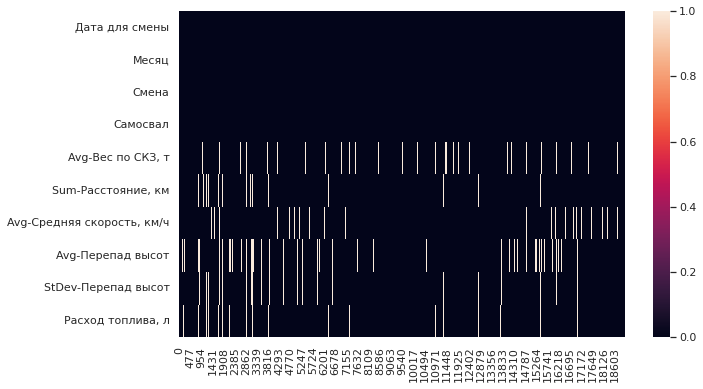

In [6]:
#визуализируем пропуски
# x - строки
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna().transpose())
plt.savefig('/home/anya-mankova/emco/images/nullst.png', dpi=70)

In [7]:
df = df.dropna()

построим гистограммы частотного распределения:

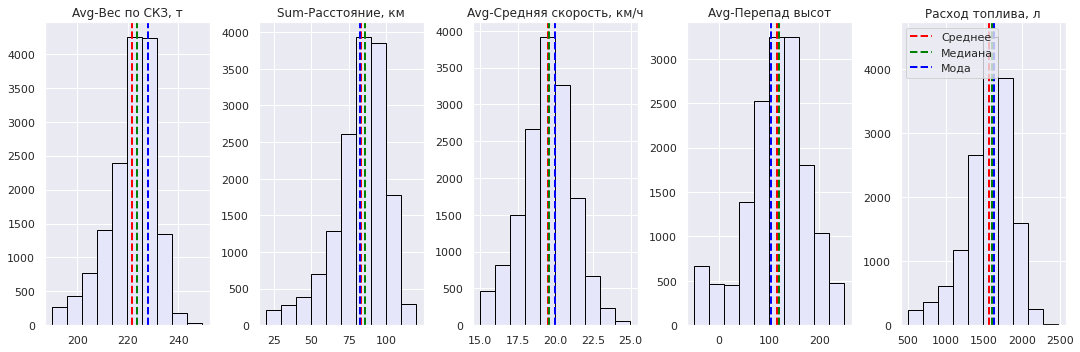

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 5), facecolor='white')

for i, column in enumerate(df[['Avg-Вес по СКЗ, т', 'Sum-Расстояние, км', 'Avg-Средняя скорость, км/ч', 'Avg-Перепад высот', 'Расход топлива, л']]):
    axes[i].hist(df[column], bins=10, edgecolor='black', color='#E6E6FA')
    axes[i].set_title(column)
    axes[i].axvline(df[column].mean(), color='red', linestyle='dashed', linewidth=2, label='Среднее')
    axes[i].axvline(df[column].median(), color='green', linestyle='dashed', linewidth=2, label='Медиана')
    axes[i].axvline(df[column].mode().iloc[0], color='blue', linestyle='dashed', linewidth=2, label='Мода')
plt.legend()
plt.tight_layout()
plt.savefig('/home/anya-mankova/emco/images/all_hist.png', dpi=100)
plt.show()

In [9]:
d = {'Характеристика': pd.Series(['Средний вес, т',
                                  'Среднее расстояние, км',
                                  'Средняя скорость, км/ч',
                                  'Средний перепад высот',
                                  'Средний расход топлива']),
     'Среднее': pd.Series([df['Avg-Вес по СКЗ, т'].mean().round(3),
                           df['Sum-Расстояние, км'].mean().round(3),
                           df['Avg-Средняя скорость, км/ч'].mean().round(3),
                           df['Avg-Перепад высот'].mean().round(3),
                           df['Расход топлива, л'].mean().round(3)]),
     'Медиана': pd.Series([df['Avg-Вес по СКЗ, т'].median().round(3),
                           df['Sum-Расстояние, км'].median().round(3),
                           df['Avg-Средняя скорость, км/ч'].median().round(3),
                           df['Avg-Перепад высот'].median().round(3),
                           df['Расход топлива, л'].median().round(3)]),
     'Мода': pd.Series([df['Avg-Вес по СКЗ, т'].mode().iloc[0],
                        df['Sum-Расстояние, км'].mode().iloc[0],
                        df['Avg-Средняя скорость, км/ч'].mode().iloc[0],
                        df['Avg-Перепад высот'].mode().iloc[0],
                        df['Расход топлива, л'].mode().iloc[0]])
    }         

indicators = pd.DataFrame(d)
indicators

,Характеристика,Среднее,Медиана,Мода
0,"Средний вес, т",221.622,223.500,228.00
1,"Среднее расстояние, км",82.893,85.700,82.36
2,"Средняя скорость, км/ч",19.486,19.583,19.97
3,Средний перепад высот,114.737,119.470,102.90
4,Средний расход топлива,1566.612,1608.000,1632.00


In [10]:
def iqr(data):
    #посчитаю межквартильный размах: определю первый и третий квантили данных 
    data = data.sort_values()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    return round(iqr, 3)

In [11]:
avg_weight = df['Avg-Вес по СКЗ, т'].dropna()
avg_hight = df['Avg-Перепад высот'].dropna()
avg_dist = df['Sum-Расстояние, км'].dropna()
avg_speed = df['Avg-Средняя скорость, км/ч'].dropna()
avg_fuel = df['Расход топлива, л'].dropna()

d_n = {'Характеристики показателей': pd.Series(['Средний вес, т',
                                              'Среднее расстояние, км',
                                              'Средняя скорость, км/ч',
                                              'Средний перепад высот',
                                              'Средний расход топлива']),
     'Дисперсия': pd.Series([np.var(avg_weight).round(3),
                             np.var(avg_dist).round(3),
                             np.var(avg_speed).round(3),
                             np.var(avg_hight).round(3),
                             np.var(avg_fuel).round(3)]),
     'Стандартное отклонение': pd.Series([np.std(avg_weight).round(3),
                                          np.std(avg_dist).round(3),
                                          np.std(avg_speed).round(3),
                                          np.std(avg_hight).round(3),
                                          np.std(avg_fuel).round(3)]),
     'Коэффициент вариации': pd.Series([round(avg_weight.std() / avg_weight.mean(), 3),
                                        round(avg_dist.std() / avg_dist.mean(), 3),
                                        round(avg_speed.std() / avg_speed.mean(), 3),
                                        round(avg_hight.std() / avg_hight.mean(), 3),
                                        round(avg_fuel.std() / avg_fuel.mean(), 3)]),
     'Межквартильный размах': pd.Series([iqr(avg_weight),
                                         iqr(avg_dist),
                                         iqr(avg_speed),
                                         iqr(avg_hight),
                                         iqr(avg_fuel)])
    }         

indicators1 = pd.DataFrame(d_n)
indicators1

,Характеристики показателей,Дисперсия,Стандартное отклонение,Коэффициент вариации,Межквартильный размах
0,"Средний вес, т",89.870,9.480,0.043,11.551
1,"Среднее расстояние, км",299.969,17.320,0.209,20.300
2,"Средняя скорость, км/ч",2.844,1.687,0.087,2.134
3,Средний перепад высот,3717.665,60.973,0.531,72.615
4,Средний расход топлива,91832.775,303.039,0.193,355.000


Представлены некоторые статистические характеристики для разных показателей.
Дисперсия - мера разброса данных относительно их среднего значения.
Высокий показатель дисперсии (по показателям Расход топлива и Перепад высот) свидетельствует о высокой степени разброса данных в выборке. То есть, данные в выборке могут значительно отклоняться от среднего значения, что может объясняться наличием выбросов.

Стандартное отклонение - квадратный корень из дисперсии, означает степень отклонения данных от среднего значения.

Коэффициент вариации - отношение стандартного отклонения к среднему значению, показывает, насколько большой разброс данных относительно их среднего значения. Интерпретируем данные: для среднего веса, средней скорости - данные с низкой изменчивостью, для среднего расстояния, среднего расхода топлива, среднего перепада высот - со средней изменчивостью.

Межквартильный размах - это разница между 75-м и 25-м процентилем данных,  используется для измерения разброса данных, показывает какие данные лежат в интервале между квартилями 25-75. 
Интерпретируем данные:
- срдений вес - межквартильный размах равен 11.731, что означает, что 50% значений находятся в диапазоне от (среднее значение - 5.8655) до (среднее значение + 5.8655)
- среднее расстояние - межквартильный размах равен 21.78 что означает, что 50% значений находятся в диапазоне от (среднее значение - 10.89) до (среднее значение + 10.89)
- средняя скорость - межквартильный размах равен 2.221, что означает, что 50% значений находятся в диапазоне от (среднее значение - 1.11) до (среднее значение + 1.11)
- средний перепад высот - межквартильный размах равен 75.535, что означает, что 50% значений находятся в диапазоне от (среднее значение - 37.8) до (среднее значение + 37.8)
- средний расход топлива - межквартильный размах равен 394, что означает, что 50% значений находятся в диапазоне от (среднее значение - 197) до (среднее значение + 197)

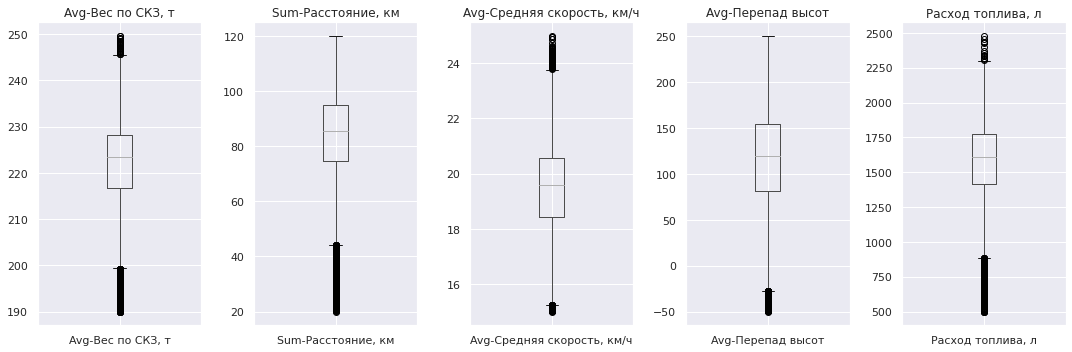

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 5), facecolor='white')
columns = ['Avg-Вес по СКЗ, т', 'Sum-Расстояние, км', 'Avg-Средняя скорость, км/ч', 'Avg-Перепад высот', 'Расход топлива, л']
for ax, column in zip(axes, columns):
    df.boxplot(column=column, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('')    
plt.tight_layout()
plt.savefig('/home/anya-mankova/emco/images/all_boxplot.png', dpi=100)
plt.show()

видим, что в наших данных существуют выбросы, которые находятся за пределами +- 1,5 межквартильных размаха

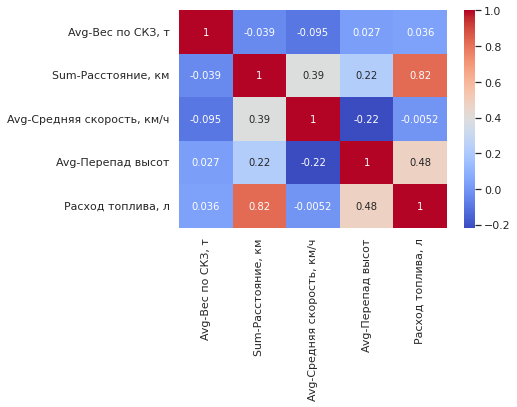

In [13]:
corr = df[['Avg-Вес по СКЗ, т', 'Sum-Расстояние, км', 'Avg-Средняя скорость, км/ч', 'Avg-Перепад высот', 'Расход топлива, л']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.savefig('/home/anya-mankova/emco/images/corr.png', dpi=80)

посмотрим также на корреляцию признаков: очевидна взаимосвязь между расходом топлива и пройденным расстоянием, также довольно значительно на расход топлива влияет перепад высот.

Проверим некоторые гипотезы:
     1) Н0 - не существует различий в расходе топлива в зависимости от смены
        Н1 - существуют различия в расходе топлива в зависимости от смены
     2) Н0 - не существует различий в расходе топлива в зависимости от времени года
        Н1 - существуют различия в расходе топлива в зависимости от времени года
     3) Н0 - не существует различий в расходе топлива в зависимости от самосвала
        Н1 - существуют различия в расходе топлива в зависимости от самосвала

принимаю размер выборки равным 30.

In [91]:
def rand_sample(data, size):
    return data.sample(n=size)

In [15]:
groupped_data = df[['Месяц', 'Самосвал', 'Смена', 'Расход топлива, л']].dropna()
groupped_data.head()

,Месяц,Самосвал,Смена,"Расход топлива, л"
0,10,1035,1,575.0
1,10,1037,1,1795.0
2,10,1039,1,1688.0
5,10,1043,1,2181.0
7,10,1345,1,1414.0


In [93]:
import scipy.stats as st
work_shift1 = rand_sample(groupped_data[groupped_data['Смена']==1], 30)
work_shift2 = rand_sample(groupped_data[groupped_data['Смена']==2], 30)
work_shift1 = pd.Series(work_shift1['Расход топлива, л'])
work_shift2 = pd.Series(work_shift2['Расход топлива, л'],)

In [94]:
shift_df = pd.DataFrame({'Выборка для смены 1':work_shift1, 'Выборка для смены 2':work_shift2}).agg(['mean','std','count','sem']).transpose()
shift_df.columns = ['Mx','SD','N','SE']

# рассчитываем 95% интервал отклонения среднего
p = 0.95
K = stats.t.ppf((1 + p)/2, shift_df['Mx']-1)
shift_df['interval'] = K * shift_df['SE']

shift_df

,Mx,SD,N,SE,interval
Выборка для смены 1,1663.066667,265.619891,30.0,48.495335,95.118378
Выборка для смены 2,1572.200000,194.903584,30.0,35.584363,69.797838


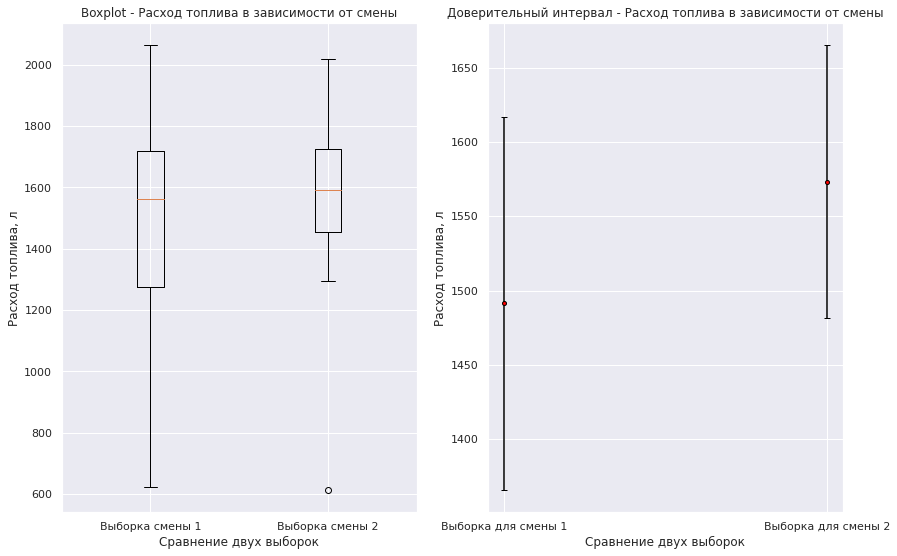

In [18]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 9), facecolor='white')
bplot1 = ax1.boxplot([work_shift1, work_shift2], labels=['Выборка смены 1', 'Выборка смены 2'])

#график доверительных интервалов
bplot2 = ax2.errorbar(x=shift_df.index, y=shift_df['Mx'], yerr=shift_df['interval'],\
                      color="black", capsize=3,
                      markersize=4, mfc="red", mec="black", fmt ='o')

for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax1.set_title('Boxplot - Расход топлива в зависимости от смены')
    ax2.set_title('Доверительный интервал - Расход топлива в зависимости от смены')
    ax.set_xlabel('Сравнение двух выборок')
    ax.set_ylabel('Расход топлива, л')

plt.show()

In [19]:
from scipy.stats import t
from numpy import sqrt

mean_1, mean_2 = work_shift1.mean(), work_shift2.mean()
sd_1, sd_2 = np.std(work_shift1), np.std(work_shift2)
N = 30

se = sqrt((sd_1 ** 2)/N + (sd_2 ** 2)/N)
t_value = (mean_1 - mean_2)/se

p = t.sf(t_value, N-2)
print(f'p={p}')
if p >= 0.05:
    print('Мы НЕ можем отклонить нулевую гипотезу')
else:
    print('Мы можем отклонить нулевую гипотезу')

p=0.8483123646901447
Мы НЕ можем отклонить нулевую гипотезу


Средние двух выборок примерно равны и находятся в доверительных интервалов друг друга.
Таким образом, мы не можем отвергнуть нулевую гипотезу (1) о том, что не существует различий в расходе топлива в зависимости от смены.

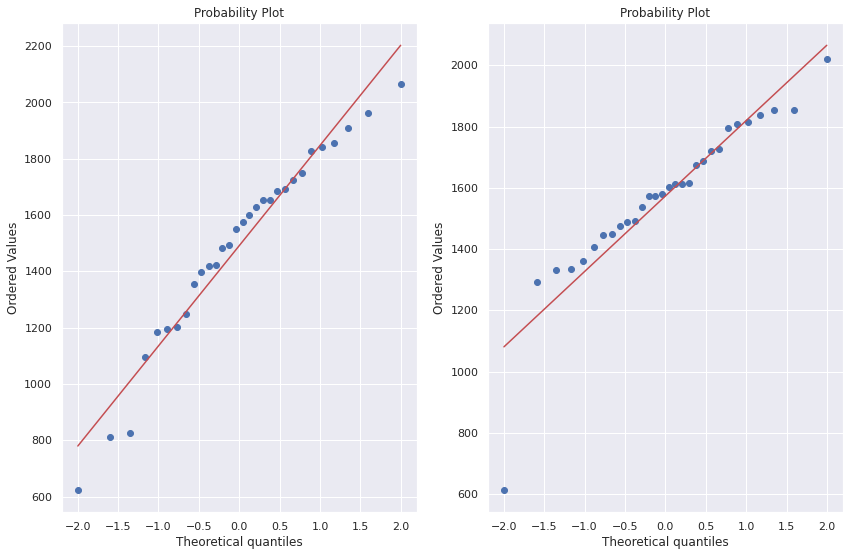

In [20]:
from scipy.stats import probplot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 9), facecolor='white')

qqplot1 = stats.probplot(work_shift1, dist="norm", plot=ax1)
qqplot2 = stats.probplot(work_shift2, dist="norm", plot=ax2)

plt.show()

In [21]:
from scipy.stats import ttest_ind

#тест Шапиро=Уилка, 
stat1, p1 = shapiro(work_shift1)
stat2, p2 = shapiro(work_shift2)
print('Тест для смены 1: Statistics=%.3f, p-value=%.3f' % (stat1, p1))
print('Тест для смены 2: Statistics=%.3f, p-value=%.3f' % (stat2, p2))

alpha = 0.05
for p in [p1, p2]:
    if p > alpha:
        print('Распределение похоже на нормальное')
    else:
        print('Распределение не похоже на нормальное)')

Тест для смены 1: Statistics=0.954, p-value=0.222
Тест для смены 2: Statistics=0.875, p-value=0.002
Распределение похоже на нормальное
Распределение не похоже на нормальное)


Проверим вторую гипотезу:
Н0 - не существует различий в расходе топлива в зависимости от времени года
Н1 - существуют различия в расходе топлива в зависимости от времени года

In [22]:
sample_month1 = rand_sample(groupped_data[groupped_data['Месяц']==np.random.choice(range(1, 12))], 30)
sample_month2 = rand_sample(groupped_data[groupped_data['Месяц']==np.random.choice(range(1, 12))], 30)

print(sample_month1['Месяц'].head(1))
print(sample_month2['Месяц'].head(1))

sample_month1 = pd.Series(sample_month1['Расход топлива, л'])
sample_month2 = pd.Series(sample_month2['Расход топлива, л'])

1656    10
Name: Месяц, dtype: int64
10993    5
Name: Месяц, dtype: int64


In [23]:
month_df = pd.DataFrame({'Выборка для месяца 1':sample_month1, 'Выборка для месяца 2':sample_month2}).agg(['mean','std','count','sem']).transpose()
month_df.columns = ['Mx','SD','N','SE']

# рассчитываем 95% интервал отклонения среднего
p = 0.95
K = stats.t.ppf((1 + p)/2, month_df['Mx']-1)
month_df['interval'] = K * month_df['SE']

month_df

,Mx,SD,N,SE,interval
Выборка для месяца 1,1394.533333,397.163020,30.0,72.511715,142.243895
Выборка для месяца 2,1619.000000,241.855471,30.0,44.156566,86.610067


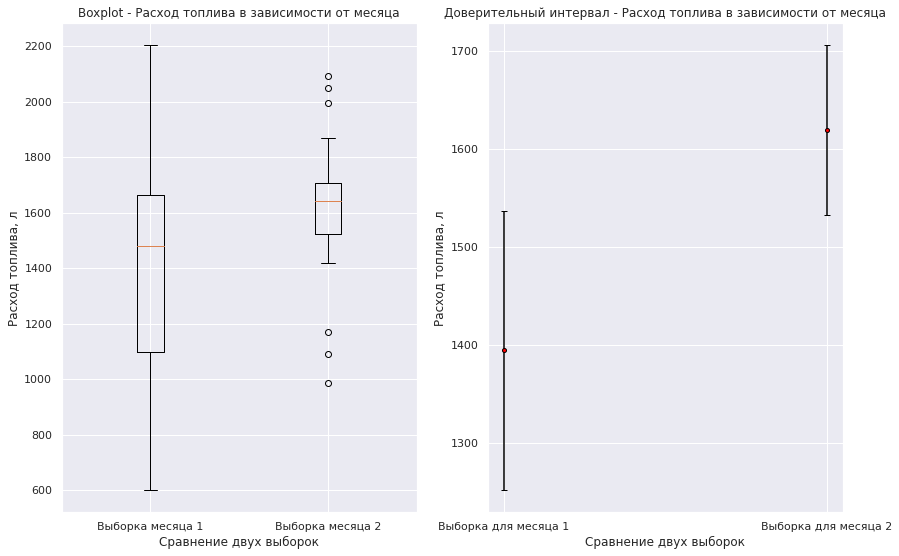

In [24]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 9), facecolor='white')
bplot1 = ax1.boxplot([sample_month1, sample_month2], 
                     labels=['Выборка месяца 1', 'Выборка месяца 2'])

#график доверительных интервалов
bplot2 = ax2.errorbar(x=month_df.index, y=month_df['Mx'], yerr=month_df['interval'],\
                      color="black", capsize=3,  
                      markersize=4, mfc="red", mec="black", fmt ='o')

for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax1.set_title('Boxplot - Расход топлива в зависимости от месяца')
    ax2.set_title('Доверительный интервал - Расход топлива в зависимости от месяца')
    ax.set_xlabel('Сравнение двух выборок')
    ax.set_ylabel('Расход топлива, л')

plt.show()

Средние выборок отличаются
Таким образом, мы не можем отвергнуть нулевую гипотезу (2) о том, что не существует различий в расходе топлива в зависимости от месяца.

In [25]:
mean_m1, mean_m2 = sample_month1.mean(), sample_month2.mean()

sd_m1, sd_m2 = np.std(sample_month1), np.std(sample_month2)
N = 30

se = sqrt((sd_1 ** 2)/N + (sd_2 ** 2)/N)
t_value = (mean_m1 - mean_m2)/se

p = t.sf(t_value, N-2)
print(f'p={p}')
if p >= 0.05:
    print('Мы НЕ можем отклонить нулевую гипотезу')
else:
    print('Мы можем отклонить нулевую гипотезу')

p=0.9962137623344312
Мы НЕ можем отклонить нулевую гипотезу


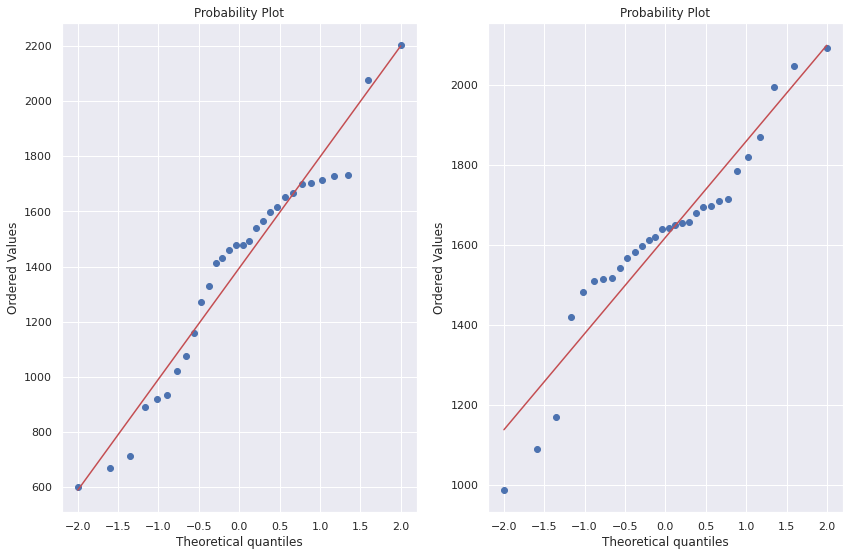

In [26]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 9), facecolor='white')

qqplot_m1 = stats.probplot(sample_month1, dist="norm", plot=ax1)
qqplot_m2 = stats.probplot(sample_month2, dist="norm", plot=ax2)

plt.show()

In [27]:
#тест Шапиро=Уилка, 
stat1, p1 = shapiro(sample_month1)
stat2, p2 = shapiro(sample_month2)
print('Тест для месяца 1: Statistics=%.3f, p-value=%.3f' % (stat1, p1))
print('Тест для месяца 2: Statistics=%.3f, p-value=%.3f' % (stat2, p2))

alpha = 0.05
for p in [p1, p2]:
    if p > alpha:
        print('Распределение похоже на нормальное')
    else:
        print('Распределение не похоже на нормальное')

Тест для месяца 1: Statistics=0.952, p-value=0.191
Тест для месяца 2: Statistics=0.923, p-value=0.032
Распределение похоже на нормальное
Распределение не похоже на нормальное


видим, что для месяца 1 тест Шапиро-Уилка отвергает гипотезу о нормальном распределении данных. это связано с наличием выбросов - самая первая точка графика QQplot со значением расхода топлива менее 600 л сильно влияет на наши данные. в остальном наши данные распределены похожим образом, поэтому мы НЕ отвергаем гипотезу о том, что не существует различий в расходе топлива в зависимости от времени года.

Проверим гипотезу 3:
Н0 - не существует различий в расходе топлива в зависимости от самосвала
Н1 - существуют различия в расходе топлива в зависимости от самосвала

рандомно выберем два самосвала из нашей выборки

In [28]:
print(groupped_data['Самосвал'].nunique())
unique_trucks = groupped_data['Самосвал'].unique().tolist()
print(unique_trucks)

37
[1035, 1037, 1039, 1043, 1345, 1347, 1349, 1373, 1374, 1380, 1385, 1386, 1395, 1403, 1404, 1409, 1491, 1494, 1496, 1497, 1498, 1499, 1502, 1503, 1504, 1505, 1044, 1038, 1041, 1042, 1490, 1492, 1493, 1862, 1866, 1381, 1036]


In [29]:
sample_trucks1 = rand_sample(groupped_data[groupped_data['Самосвал']==np.random.choice(unique_trucks)], 30)
sample_trucks2 = rand_sample(groupped_data[groupped_data['Самосвал']==np.random.choice(unique_trucks)], 30)

print(sample_trucks1['Самосвал'].head(1))
print(sample_trucks2['Самосвал'].head(1))

sample_trucks1 = pd.Series(sample_trucks1['Расход топлива, л'])
sample_trucks2 = pd.Series(sample_trucks2['Расход топлива, л'])

7655    1493
Name: Самосвал, dtype: int64
133    1503
Name: Самосвал, dtype: int64


In [30]:
trucks_df = pd.DataFrame({'Выборка для самосвала 1':sample_trucks1, 'Выборка для самосвала 2':sample_trucks2}).agg(['mean','std','count','sem']).transpose()
trucks_df.columns = ['Mx','SD','N','SE']

# рассчитываем 95% интервал отклонения среднего
p = 0.95
K = stats.t.ppf((1 + p)/2, trucks_df['Mx']-1)
trucks_df['interval'] = K * trucks_df['SE']

trucks_df

,Mx,SD,N,SE,interval
Выборка для самосвала 1,1627.533333,271.376915,30.0,49.546419,97.181513
Выборка для самосвала 2,1544.866667,308.537119,30.0,56.330913,110.493185


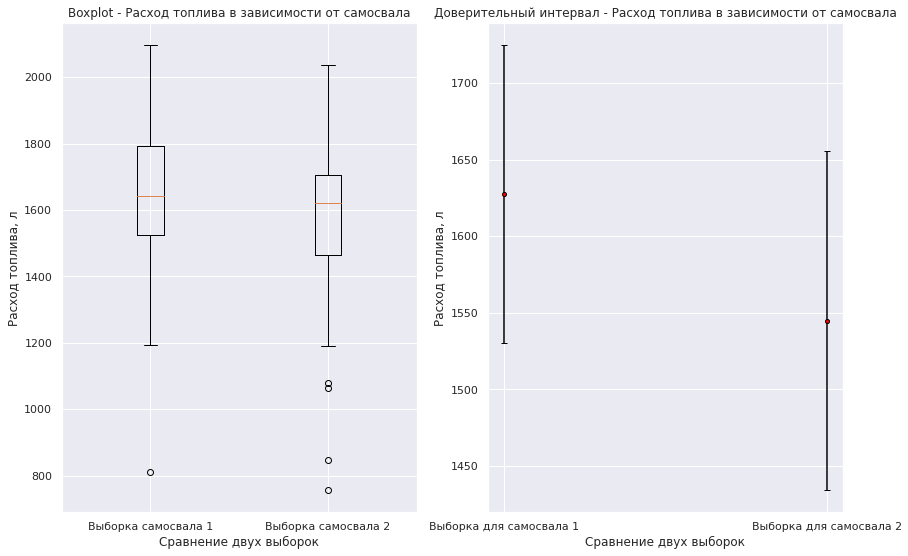

In [31]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 9), facecolor='white')
bplot1_truck = ax1.boxplot([sample_trucks1, sample_trucks2], 
                     labels=['Выборка самосвала 1', 'Выборка самосвала 2'])

#график доверительных интервалов
bplot2_truck = ax2.errorbar(x=trucks_df.index, y=trucks_df['Mx'],\
                            yerr=trucks_df['interval'],\
                            color="black", capsize=3,\
                            markersize=4, mfc="red", mec="black", fmt ='o')

for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax1.set_title('Boxplot - Расход топлива в зависимости от самосвала')
    ax2.set_title('Доверительный интервал - Расход топлива в зависимости от самосвала')
    ax.set_xlabel('Сравнение двух выборок')
    ax.set_ylabel('Расход топлива, л')

plt.show()

Средние выборок отличаются, но находятся в доверительных интервалах друг друга.
Таким образом, мы не можем отвергнуть нулевую гипотезу (3) о том, что не существует различий в расходе топлива в зависимости от самосвала.

In [32]:
mean_t1, mean_t2 = sample_trucks1.mean(), sample_trucks2.mean()

sd_t1, sd_t2 = np.std(sample_trucks1), np.std(sample_trucks2)
N = 30

se = sqrt((sd_1 ** 2)/N + (sd_2 ** 2)/N)
t_value = (mean_t1 - mean_t2)/se

p = t.sf(t_value, N-2)
print(f'p={p}')
if p >= 0.05:
    print('Мы НЕ можем отклонить нулевую гипотезу')
else:
    print('Мы можем отклонить нулевую гипотезу')

p=0.1490927007607692
Мы НЕ можем отклонить нулевую гипотезу


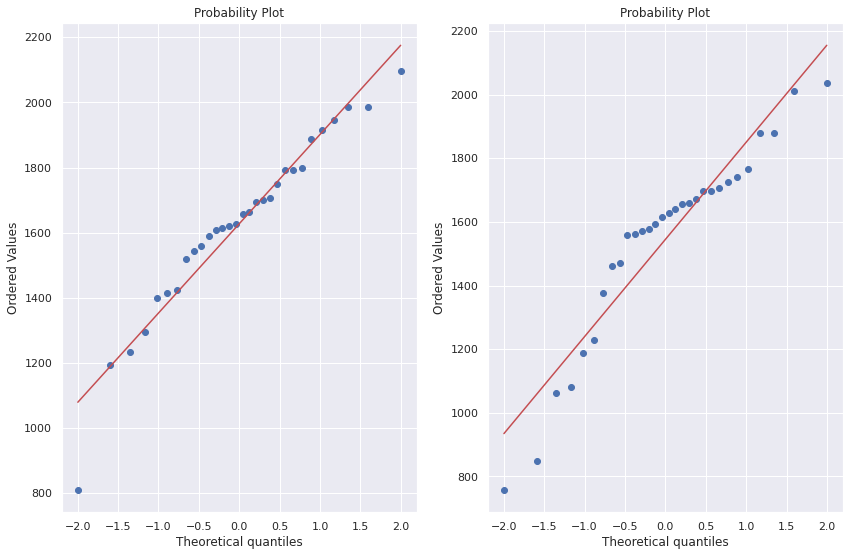

In [33]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 9), facecolor='white')

qqplot_t1 = stats.probplot(sample_trucks1, dist="norm", plot=ax1)
qqplot_t2 = stats.probplot(sample_trucks2, dist="norm", plot=ax2)

plt.show()

In [57]:
#тест Шапиро=Уилка, 
stat1, p1 = shapiro(sample_trucks1)
stat2, p2 = shapiro(sample_trucks2)
print('Тест для самосвала 1: Statistics=%.3f, p-value=%.3f' % (stat1, p1))
print('Тест для самосвала 2: Statistics=%.3f, p-value=%.3f' % (stat2, p2))

alpha = 0.05
for p in [p1, p2]:
    if p > alpha:
        print('Распределение похоже на нормальное')
    else:
        print('Распределение не похоже на нормальное')

Тест для самосвала 1: Statistics=0.954, p-value=0.210
Тест для самосвала 2: Statistics=0.909, p-value=0.014
Распределение похоже на нормальное
Распределение не похоже на нормальное


видим, что для самосвала 1 тест Шапиро-Уилка отвергает гипотезу о нормальном распределении данных. действительно, по графику QQplot наше распределение отклоняется от нормлаьного. 
вместе с тем, средние наших выборок близки и находятся в доверительных интервалах друг друга. считаю отклонять гипотезу о том, что не существует различий в расходе топлива в зависимости от самосвала неправильным.
вместе с тем, различия в расходе топлива по самосвалам может зависеть от их технических характеристик. рекомендация - проводить тщательное и своевременное ТО для каждого самосвала.

сформулируем и проверим гипотезы о различиях в расходе топлива в зависимости от веса груза и скорости движения.
разброс скоростей у нас от 15 до 24,98 км/ч, среднее = 19,401
разброс весов - от 190 до 249,56 т, среднее = 221,681
нам нужно понять, при каких параметрах значение расхода топлива меньше. при этом, нужно, чтобы снижение скорости не было фатальным, а груз был не менее чем 220 т.
рассмотрим наши три параметра более подробно:

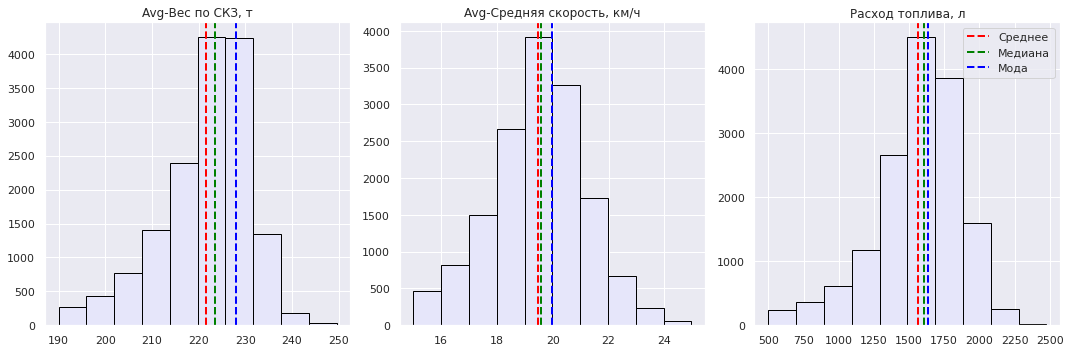

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), facecolor='white')

for i, column in enumerate(df[['Avg-Вес по СКЗ, т', 'Avg-Средняя скорость, км/ч', 'Расход топлива, л']]):
    axes[i].hist(df[column], bins=10, edgecolor='black', color='#E6E6FA')
    axes[i].set_title(column)
    axes[i].axvline(df[column].mean(), color='red', linestyle='dashed', linewidth=2, label='Среднее')
    axes[i].axvline(df[column].median(), color='green', linestyle='dashed', linewidth=2, label='Медиана')
    axes[i].axvline(df[column].mode().iloc[0], color='blue', linestyle='dashed', linewidth=2, label='Мода')
plt.legend()
plt.tight_layout()

plt.show()

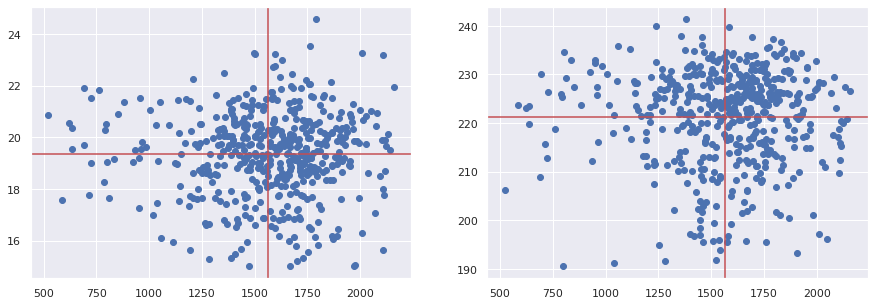

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), facecolor='white')
sample_fuel = rand_sample(df['Расход топлива, л'], 500)
sample_speed = rand_sample(df['Avg-Средняя скорость, км/ч'], 500)
sample_weight = rand_sample(df['Avg-Вес по СКЗ, т'], 500)

scplot1 = axes[0].scatter(x=sample_fuel, y=sample_speed)
scplot2 = axes[1].scatter(x=sample_fuel, y=sample_weight)

axes[0].axhline(sample_speed.mean(), color='r')
axes[1].axhline(sample_weight.mean(), color='r')

axes[0].axvline(sample_fuel.mean(), color='r')
axes[1].axvline(sample_fuel.mean(), color='r')

plt.show()

не вижу явной линейной зависимости переменных.
тем не менее, попробуем оценить зависимость переменных с помощью линейной регрессии.

In [56]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

r_s = rand_sample(df, 1000)

y = r_s['Расход топлива, л']
x = r_s[['Avg-Средняя скорость, км/ч', 'Avg-Вес по СКЗ, т']]

x = sm.add_constant(x)
model = sm.OLS(y, x).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Расход топлива, л   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9029
Date:                Sun, 09 Apr 2023   Prob (F-statistic):              0.406
Time:                        21:47:29   Log-Likelihood:                -7109.6
No. Observations:                1000   AIC:                         1.423e+04
Df Residuals:                     997   BIC:                         1.424e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

используем функцию OLS() из библиотеки statsmodels для выполнения обычной регрессии методом наименьших квадратов. показатели скорости и веса в качестве переменных-предикторов (независимые переменные) и расход топлива в качестве переменной ответа.

Коэффициент детерминации (R-squared) равен 0.002, что означает, что около 0,2% изменчивости расхода топлива могут быть объяснены изменениями в рассматриваемых параметрах. F-статистика (F-statistic) имеет значение 0,9029, а вероятность (Prob (F-statistic)) больше 0.05, что указывает на НЕ значимость модели. Каждый параметр имеет свой коэффициент (coef), который показывает, как изменение в данном параметре влияет на изменение расхода топлива. Например, каждый километр/ч увеличивает расход топлива на 3.3143 литра. В то же время, увеличение веса груза на 1 т увеличивает расход топлива на 1,2731 литра.
Стандартная ошибка (std err) и t-статистика (t) используются для оценки значимости коэффициента. P-value (P>|t|) также указывает на значимость коэффициента: в нашем случае, коэффициенты не считаются значимыми.
[1] Стандартные ошибки предполагают, что матрица ковариации ошибок правильно задана. 
[2] Значение числа условия большое, 6.15e+03. Это может указывать на наличие сильной мультиколлинеарности или других численных проблем.

const - значение коэффициента при константе (т.е. свободном члене) в модели регрессии. В данном случае, это означает, что когда все предикторы равны нулю, средний расход топлива будет составлять 1228 л/ 100 км

In [ ]:
Первая гипотеза
H0 - изменение скорости самосвала не влияет на изменение расхода топлива
H1 - изменение скорости самосвала влияет на изменение расхода топлива

для начала проранжируем наши признаки скорости от низкой до высокой. 
интервалы: 
    15-18,3 - низкая
    18,4-18,99 - ниже среднего
    19-20 - средняя
    21-20,5 - выше среднего
    20,6-25 - высокая

In [172]:
df_new = df[['Расход топлива, л', 'Avg-Вес по СКЗ, т', 'Avg-Средняя скорость, км/ч', 'оценка скорости']]

for i, row in df.iterrows():
    if row['Avg-Средняя скорость, км/ч'] >= 15 and row['Avg-Средняя скорость, км/ч'] <= 18.3:
        df_new.at[i, 'оценка скорости'] = 'низкая скорость'
    elif row['Avg-Средняя скорость, км/ч'] > 18.3 and row['Avg-Средняя скорость, км/ч'] < 19:
        df_new.at[i, 'оценка скорости'] = 'скорость ниже среднего'
    elif row['Avg-Средняя скорость, км/ч'] >= 19 and row['Avg-Средняя скорость, км/ч'] <= 20:
        df_new.at[i, 'оценка скорости'] = 'средняя скорость'
    elif row['Avg-Средняя скорость, км/ч'] > 20 and row['Avg-Средняя скорость, км/ч'] <= 20.5:
        df_new.at[i, 'оценка скорости'] = 'скорость выше среднего'
    else:
        df_new.at[i, 'оценка скорости'] = 'высокая скорость'

for i, row in df.iterrows():
    if row['Avg-Вес по СКЗ, т'] >= 190 and row['Avg-Вес по СКЗ, т'] <= 216.5:
        df_new.at[i, 'оценка весов'] = 'малый вес'
    elif row['Avg-Вес по СКЗ, т'] > 216.5 and row['Avg-Вес по СКЗ, т'] < 220:
        df_new.at[i, 'оценка весов'] = 'вес ниже среднего'
    elif row['Avg-Вес по СКЗ, т'] >= 220 and row['Avg-Вес по СКЗ, т'] <= 223.4:
        df_new.at[i, 'оценка весов'] = 'средний вес'    
    elif row['Avg-Вес по СКЗ, т'] > 223.4 and row['Avg-Вес по СКЗ, т'] <= 228.3:
        df_new.at[i, 'оценка весов'] = 'вес выше среднего'
    else:
        df_new.at[i, 'оценка весов'] = 'большой вес'
df_new.head()

,"Расход топлива, л","Avg-Вес по СКЗ, т","Avg-Средняя скорость, км/ч",оценка скорости,оценка весов
0,575.0,228.500000,17.731667,низкая скорость,большой вес
1,1795.0,214.818182,17.938182,низкая скорость,малый вес
2,1688.0,221.533333,16.754000,низкая скорость,средний вес
5,2181.0,223.800000,18.466000,скорость ниже среднего,вес выше среднего
7,1414.0,222.625000,19.187500,средняя скорость,средний вес


выполним анализ, чтобы определить, одинаковы ли средние значения расхода топлива для пяти групп скорости.
H0 - средние значения равны
H1 - по крайней мере одно среднее значение отличаетсяот остальных

In [190]:
from scipy.stats import f_oneway


group1 = rand_sample(df_new[df_new['оценка скорости']=='низкая скорость'], 50)
group2 = rand_sample(df_new[df_new['оценка скорости']=='скорость ниже среднего'], 50)
group3 = rand_sample(df_new[df_new['оценка скорости']=='средняя скорость'], 50)
group4 = rand_sample(df_new[df_new['оценка скорости']=='скорость выше среднего'], 50)
group5 = rand_sample(df_new[df_new['оценка скорости']=='высокая скорость'], 50)
sample_group1 = pd.Series(group1['Расход топлива, л'])
sample_group2 = pd.Series(group2['Расход топлива, л'])
sample_group3 = pd.Series(group3['Расход топлива, л'])
sample_group4 = pd.Series(group4['Расход топлива, л'])
sample_group5 = pd.Series(group5['Расход топлива, л'])
f_oneway(sample_group1, sample_group2, sample_group3, sample_group4, sample_group5)

F_onewayResult(statistic=2.272040141162302, pvalue=0.06210978624520251)

!!! все не так, переписать

! Поскольку p-значение МЕНЬШЕ 0,05, мы МОЖЕМ отвергнуть нулевую теорию
это значит, что ЕСТЬ основания полагать, что скорость влияет на расход топлива.
попробуем сравнить в каких именно группах есть взаимосвязь: будем сравнивать данные при средней скорости и выше/ниже среднего

In [187]:
f_oneway(sample_group2, sample_group3)

F_onewayResult(statistic=0.5457893967747999, pvalue=0.4618089792963985)

In [188]:
f_oneway(sample_group4, sample_group3)

F_onewayResult(statistic=0.3915186746982358, pvalue=0.5329567215388271)

!! все не так, переписать

различия между группами значимы!
в обоих случаях есть взаимосвязь, нужно проверить подробнее.

In [191]:
speed_df = pd.DataFrame({'Выборка для скорости ниже среднего':sample_group2, 'Выборка для средней скорости':sample_group3, 'Выборка для скорости выше среднего':sample_group4}).agg(['mean','std','count','sem']).transpose()
speed_df.columns = ['mean','SD','N','SE']

# рассчитываем 95% интервал отклонения среднего
p = 0.95
K = stats.t.ppf((1 + p)/2, speed_df['mean']-1)
speed_df['interval'] = K * speed_df['SE']

speed_df

,mean,SD,N,SE,interval
Выборка для скорости ниже среднего,1548.62,395.506232,50.0,55.933028,109.712523
Выборка для средней скорости,1620.44,274.352385,50.0,38.799286,76.102082
Выборка для скорости выше среднего,1654.74,257.158000,50.0,36.367633,71.331458


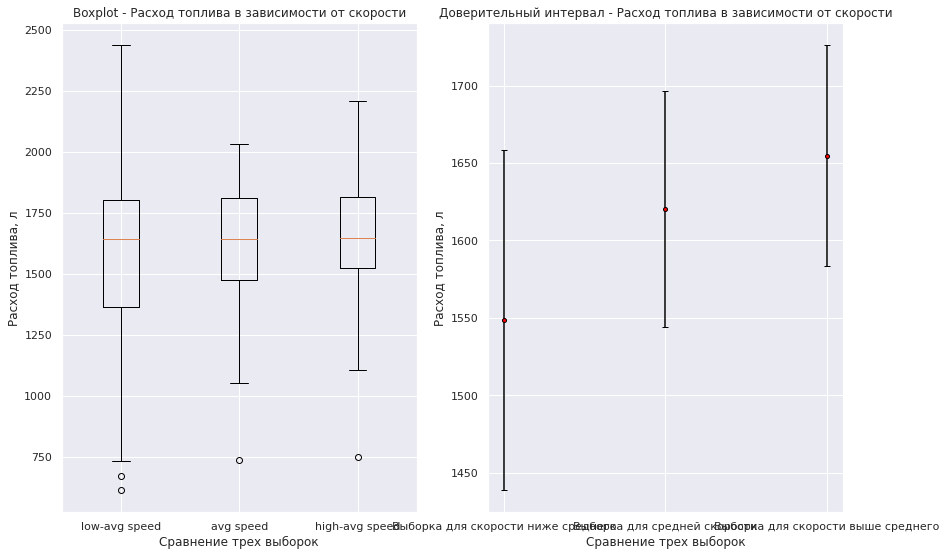

In [192]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 9), facecolor='white')
bplot1_truck = ax1.boxplot([sample_group2, sample_group3, sample_group4], 
                     labels=['low-avg speed',
                             'avg speed',
                             'high-avg speed'])

#график доверительных интервалов
bplot2_truck = ax2.errorbar(x=speed_df.index, y=speed_df['mean'],\
                            yerr=speed_df['interval'],\
                            color="black", capsize=3,\
                            markersize=4, mfc="red", mec="black", fmt ='o')

for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax1.set_title('Boxplot - Расход топлива в зависимости от скорости')
    ax2.set_title('Доверительный интервал - Расход топлива в зависимости от скорости')
    ax.set_xlabel('Сравнение трех выборок')
    ax.set_ylabel('Расход топлива, л')

plt.show()

мы МОЖЕМ отвергнуть нулевую гипотезу о том, что не существует различий в расходе топлива в зависимости от скорости, различия существуют!

In [ ]:
Вторая гипотеза
H0 - изменение веса не влияет на изменение расхода топлива
H1 - изменение веса влияет на изменение расхода топлива

для начала проранжируем наши признаки скорости от низкой до высокой. 
интервалы: 
    15-18,3 - низкая
    18,4-19,5 - средняя
    19,6-20,5 - выше среднего
    20,6-25 - высокая

In [194]:
group_w1 = rand_sample(df_new[df_new['оценка весов']=='малый вес'], 50)
group_w2 = rand_sample(df_new[df_new['оценка весов']=='вес ниже среднего'], 50)
group_w3 = rand_sample(df_new[df_new['оценка весов']=='средний вес'], 50)
group_w4 = rand_sample(df_new[df_new['оценка весов']=='вес выше среднего'], 50)
group_w5 = rand_sample(df_new[df_new['оценка весов']=='большой вес'], 50)
sample_group_w1 = pd.Series(group_w1['Расход топлива, л'])
sample_group_w2 = pd.Series(group_w2['Расход топлива, л'])
sample_group_w3 = pd.Series(group_w3['Расход топлива, л'])
sample_group_w4 = pd.Series(group_w4['Расход топлива, л'])
sample_group_w5 = pd.Series(group_w5['Расход топлива, л'])

f_oneway(sample_group_w1, sample_group_w2, sample_group_w3, sample_group_w4, sample_group_w5)

F_onewayResult(statistic=2.047966340185069, pvalue=0.08831437971324717)

! Поскольку p-значение БОЛЬШЕ 0,05, мы НЕ МОЖЕМ отвергнуть нулевую теорию
это значит, чтоу нас нет достаточных оснований полагать, что вес влияет на расход топлива

попробуем сравнить по группам, возможно между конкретными группами найдем взаимосвязь: будем сравнивать данные при загрузке ниже среднего, средней и выше среднего

In [142]:
f_oneway(sample_group_w2, sample_group_w3, sample_group_w4)

F_onewayResult(statistic=0.41254758406050285, pvalue=0.6627256961513117)

In [144]:
f_oneway(sample_group_w2, sample_group_w3)

F_onewayResult(statistic=0.8050857983800724, pvalue=0.3717761308437776)

In [143]:
f_oneway(sample_group_w3, sample_group_w4)

F_onewayResult(statistic=0.051711358191181646, pvalue=0.820585428934887)

In [145]:
f_oneway(sample_group_w3, sample_group_w5)

F_onewayResult(statistic=0.1686821254200379, pvalue=0.682182339540322)

In [146]:
f_oneway(sample_group_w1, sample_group_w5)

F_onewayResult(statistic=0.6554642789092237, pvalue=0.4201272230817694)

даже между минимальной и максимальной загрузкой не видно взаимосвязи

In [195]:
weight_df = pd.DataFrame({'Выборка для малого веса':sample_group_w1, 'Выборка для веса ниже среднего':sample_group_w2, 'Выборка для среднего веса':sample_group_w3, 'Выборка для веса выше среднего':sample_group_w4, 'Выборка для большого веса':sample_group_w5}).agg(['mean','std','count','sem']).transpose()
weight_df.columns = ['mean','SD','N','SE']

# рассчитываем 95% интервал отклонения среднего
p = 0.95
K = stats.t.ppf((1 + p)/2, weight_df['mean']-1)
weight_df['interval'] = K * weight_df['SE']

weight_df

,mean,SD,N,SE,interval
Выборка для малого веса,1591.56,312.849456,50.0,44.243594,86.781889
Выборка для веса ниже среднего,1513.04,319.624905,50.0,45.201788,88.664850
Выборка для среднего веса,1617.48,293.210883,50.0,41.466281,81.333316
Выборка для веса выше среднего,1476.70,281.145271,50.0,39.759945,77.992029
Выборка для большого веса,1595.84,290.279904,50.0,41.051778,80.521115


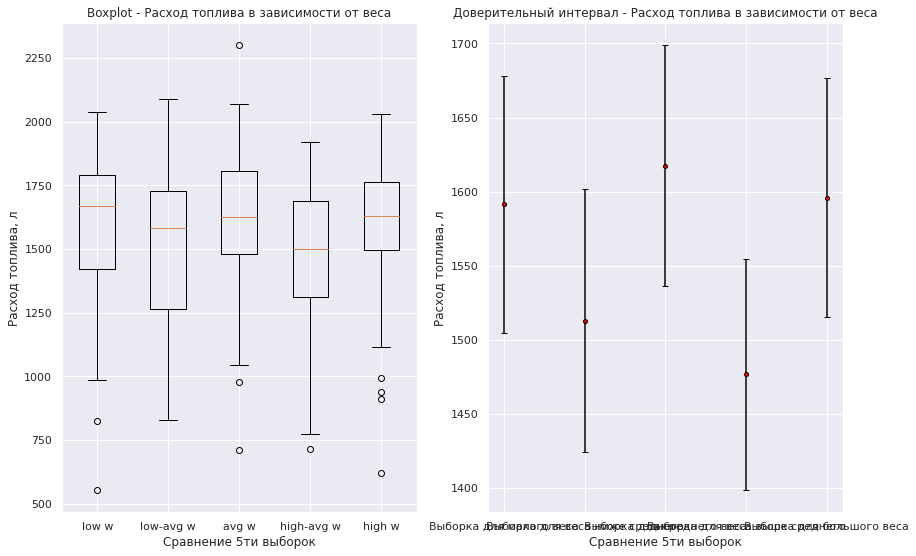

In [196]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 9), facecolor='white')
bplot1_truck = ax1.boxplot([sample_group_w1, sample_group_w2, sample_group_w3, sample_group_w4, sample_group_w5], 
                     labels=['low w',
                             'low-avg w',
                             'avg w',
                             'high-avg w',
                             'high w'])

#график доверительных интервалов
bplot2_truck = ax2.errorbar(x=weight_df.index, y=weight_df['mean'],\
                            yerr=weight_df['interval'],\
                            color="black", capsize=3,\
                            markersize=4, mfc="red", mec="black", fmt ='o')

for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax1.set_title('Boxplot - Расход топлива в зависимости от веса')
    ax2.set_title('Доверительный интервал - Расход топлива в зависимости от веса')
    ax.set_xlabel('Сравнение 5ти выборок')
    ax.set_ylabel('Расход топлива, л')

plt.show()

в целом средние примерно равны, только во второй группе среднее уж очень выбивается, расход топлива при загрузке ниже среднего почему-то выше, чем, например при средней загрузке.

In [201]:
low_sp = df_new[df_new['оценка скорости']=='скорость ниже среднего']
low_sp = low_sp[low_sp['оценка весов']=='вес ниже среднего']
low_sp

,"Расход топлива, л","Avg-Вес по СКЗ, т","Avg-Средняя скорость, км/ч",оценка скорости,оценка весов
52,1694.0,218.818182,18.558182,скорость ниже среднего,вес ниже среднего
54,2297.0,218.000000,18.715294,скорость ниже среднего,вес ниже среднего
56,1089.0,218.250000,18.333333,скорость ниже среднего,вес ниже среднего
130,1587.0,216.523810,18.672857,скорость ниже среднего,вес ниже среднего
195,723.0,219.875000,18.548750,скорость ниже среднего,вес ниже среднего
...,...,...,...,...,...
18501,1228.0,219.750000,18.879375,скорость ниже среднего,вес ниже среднего
18644,1369.0,217.642857,18.840000,скорость ниже среднего,вес ниже среднего
18754,1539.0,218.466667,18.368000,скорость ниже среднего,вес ниже среднего
18860,2040.0,217.266667,18.482667,скорость ниже среднего,вес ниже среднего


дальше зафигачить анализ:
одинаковая скорость - разный вес
одинаковый вес - разная скорость

In [198]:


group1_sw = df_new[[df_new['оценка скорости']=='скорость ниже среднего' and
            df_new['оценка весов']=='вес ниже среднего']]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [158]:

group1_sw = rand_sample(df_new[[df_new['оценка скорости']=='скорость ниже среднего' and
                               df_new['оценка весов']=='вес ниже среднего']], 10)
group2_sw = rand_sample(df_new[df_new[['оценка скорости']=='средняя скорость' and
                               df_new['оценка весов']=='вес ниже среднего']], 10)
group3_sw = rand_sample(df_new[[df_new['оценка скорости']=='скорость выше среднего' and
                               df_new['оценка весов']=='вес ниже среднего']], 10)

sample_group1_sw = pd.Series(group1_sw['Расход топлива, л'])
sample_group2_sw = pd.Series(group2_sw['Расход топлива, л'])
sample_group3_sw = pd.Series(group3_sw['Расход топлива, л'])
f_oneway(sample_group1_sw, sample_group2_sw, sample_group3_sw)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [141]:
group_w5.head()

,"Расход топлива, л","Avg-Вес по СКЗ, т","Avg-Средняя скорость, км/ч",оценка скорости,оценка весов
8923,1189.0,229.800000,19.019000,средняя скорость,большой вес
10001,1552.0,235.411765,19.595294,высокая скорость,большой вес
13708,1394.0,229.272727,21.837727,высокая скорость,большой вес
4528,1320.0,230.684211,19.127368,средняя скорость,большой вес
7627,1728.0,228.954545,18.624091,средняя скорость,большой вес


! и снова, p-значение не меньше 0,05, мы не можем отвергнуть нулевую теорию :(
это значит, что у нас нет достаточных доказательств, что вес явно влияет на расход топлива.

In [111]:
f_oneway(sample_group_w2, sample_group_w4)

F_onewayResult(statistic=2.208506901936651, pvalue=0.14266730391173515)

как стандартизировать значения:

In [ ]:
import sklearn
from sklearn import preprocessing
avg_weight

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(np.array(avg_weight - avg_weight.mean()).reshape(-1, 1))
print(min(np_scaled))
print(max(np_scaled))

построение доверительных интервалов
среднее плюс/минус 1.96 * (стандартное отклонение / корень из кол-ва наблюдений)

In [ ]:
from math import sqrt
sample_weight = avg_weight.sample(n=30)
std = np.std(sample_weight)
mean_w = sample_weight.mean()
se = std / sqrt(30)
print(se)

left_int = mean_w - 1.96 * se
rigth_int = mean_w + 1.96 * se
print(left_int, mean_w, rigth_int)

Гипотезы:

1. о существовании связи между расходом топлива и средней скоростью
2. о существовании связи между расходом топлива и пройденным расстоянием
3. о том что расход топлива в зависимости от смены не отличается
4. о том что расход топлива в зависимости от самосвала не отличается
5. о том что расход топлива в зависимости от месяца может отличаться

Для проверки гипотезы о среднем значении выборки на основе данной информации можно использовать t-тест Стьюдента. Попытаемся определить, насколько вероятно, что наши результаты отражают реальные различия в исследуемой генеральной совокупности, а не просто случайность или шум в данных.
Нулевая гипотеза - две выборки имеют одинаковые средние значения

Когда мы применяем t-тест, мы сравниваем две выборки, сравнивая их средние значения и стандартные отклонения. Тест вычисляет t-статистику, которая показывает, насколько различны средние значения выборок относительно их стандартных отклонений. Значение t-статистики сравнивается с табличным значением, определенным на основе уровня доверия и степеней свободы. Если t-статистика превышает табличное значение, то мы можем отвергнуть нулевую гипотезу и сделать вывод, что между выборками существует статистически значимое различие. Если значение t-статистики меньше табличного, то мы не можем отвергнуть нулевую гипотезу, и мы не можем сказать, что различия статистически значимы.

P-значение означает, насколько вероятно, что различия, которые мы наблюдаем в выборках, могут быть случайными. Если p-значение меньше уровня значимости, то мы можем считать, что различия статистически значимы. Если же p-значение больше уровня значимости, то мы не можем отвергнуть нулевую гипотезу, и мы не можем считать, что различия статистически значимы.

уровень значимости = 5%
уровень доверия = 95%

In [ ]:
def rand_sample(data, size):
    return data.sample(n=size)

In [ ]:
import scipy.stats as st

sample1_avg_weight = rand_sample(avg_weight, 30)
sample2_avg_weight = rand_sample(avg_weight, 30)

t_statistic, p_value = st.ttest_ind(sample1_avg_weight, sample2_avg_weight)

print("t-статистика:", t_statistic)
print("p-значение:", p_value)
alpha = 0.05
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Принимаем нулевую гипотезу")

In [ ]:
plt.figure(facecolor='white')
sns.boxplot(x=sample_avg_weight)
plt.xlabel('Средний вес, тонн')
plt.title('Boxplot среднего веса')
plt.savefig('/home/anya-mankova/emco/images/avg_weight/aw_boxplot.png', dpi=50)
plt.show()

In [ ]:
avg_height = df['Avg-Перепад высот'].dropna()
print(f' Количество наблюдений {avg_height.count()}')
# 17242 строк с данными
plt.hist(avg_height, bins=20, edgecolor='black', color='#E6E6FA', facecolor='white')

plt.xlabel('средний перепад высот за смену')
plt.ylabel('количество наблюдений')
plt.title('Гистограмма распределения среднего перепада высот')
plt.axvline(avg_height.mean(), color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(avg_height.median(), color='green', linestyle='dashed', linewidth=2, label='Медиана')
plt.axvline(avg_height.mode().iloc[0], color='blue', linestyle='dashed', linewidth=2, label='Мода')
plt.legend()

plt.savefig('/home/anya-mankova/emco/images/avg_height/ah_hist.png', dpi=100)
plt.show()

In [ ]:
print("Дисперсия: ", np.var(avg_height))
print("Стандартное отклонение: ", np.std(avg_height))
print("Коэффициент вариации: ", avg_height.std() / avg_height.mean())
print("Межквартильный размах: ", avg_height.quantile(0.75) - avg_height.quantile(0.25))
print()

#тест Лиллиефорса
test_stat, p_value = lilliefors(avg_height, dist='norm')
print(f'Тест Лиллиефорса: критерий = {round(test_stat, 3)}, p-val = {round(p_value, 3)}')

In [ ]:
stats.probplot(avg_height, dist="norm", plot=plt)
plt.savefig('/home/anya-mankova/emco/images/avg_height/ah_qqplot.png', dpi=50)
plt.show()

In [ ]:
plt.figure(facecolor='white')
sns.boxplot(x=avg_height)
plt.xlabel('Средний перепад высот')
plt.title('Boxplot среднего перепада высот')
plt.savefig('/home/anya-mankova/emco/images/avg_height/ah_boxplot.png', dpi=50)
plt.show()

In [ ]:
dist = df['Sum-Расстояние, км'].dropna()
print(f' Количество наблюдений {dist.count()}')
# 18552 строки с данными
plt.hist(dist, bins=20, edgecolor='black', color='#E6E6FA', facecolor='white')

plt.xlabel('пройденное расстояние суммарно за смену, км')
plt.ylabel('количество наблюдений')
plt.title('Гистограмма распределения пройденного расстояния (суммарно) за смену')
plt.axvline(dist.mean(), color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(dist.median(), color='green', linestyle='dashed', linewidth=2, label='Медиана')
plt.axvline(dist.mode().iloc[0], color='blue', linestyle='dashed', linewidth=2, label='Мода')
plt.legend()

plt.savefig('/home/anya-mankova/emco/images/dist/dist_hist.png', dpi=100)
plt.show()

In [ ]:
print("Дисперсия: ", np.var(dist))
print("Стандартное отклонение: ", np.std(dist))
print("Коэффициент вариации: ", dist.std() / dist.mean())
print("Межквартильный размах: ", dist.quantile(0.75) - dist.quantile(0.25))
print()

#тест Лиллиефорса
test_stat, p_value = lilliefors(dist, dist='norm')
print(f'Тест Лиллиефорса: критерий = {round(test_stat, 3)}, p-val = {round(p_value, 3)}')

In [ ]:
stats.probplot(dist, dist="norm", plot=plt)
plt.savefig('/home/anya-mankova/emco/images/dist/dist_qqplot.png', dpi=50)
plt.show()

In [ ]:
import sklearn
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(df[['Avg-Вес по СКЗ, т', 'Sum-Расстояние, км', 'Avg-Средняя скорость, км/ч', 'Avg-Перепад высот', 'StDev-Перепад высот', 'Расход топлива, л']].dropna())
df_norm = pd.DataFrame(np_scaled)
df_norm.head()